# 데이터 스케일링

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

<function RandomState.normal>

## standard scaling

In [5]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df,columns=['x1','x2'])
standard_df

,x1,x2
0,-1.484146,-0.842392
1,0.126998,-0.057473
2,0.087498,-0.117794
3,-0.160534,0.222581
4,1.306414,-0.219784
...,...,...
1020,-4.454639,4.496005
1021,-4.671651,5.299665
1022,-4.923432,5.818593
1023,-5.358201,5.387392


## minmax scaling

In [6]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df,columns=['x1','x2'])
minmax_df

,x1,x2
0,0.581562,0.109279
1,0.766453,0.207827
2,0.761920,0.200254
3,0.733456,0.242989
4,0.901799,0.187449
...,...,...
1020,0.240676,0.779527
1021,0.215772,0.880428
1022,0.186878,0.945581
1023,0.136985,0.891443


## Robust scaling

In [7]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df,columns=['x1','x2'])
robust_df

,x1,x2
0,-2.038436,-0.981024
1,0.000000,0.051563
2,-0.049976,-0.027791
3,-0.363789,0.419983
4,1.492208,-0.161963
...,...,...
1020,-5.796733,6.041820
1021,-6.071300,7.099062
1022,-6.389855,7.781730
1023,-6.939929,7.214469


## seaborn에 그려보기

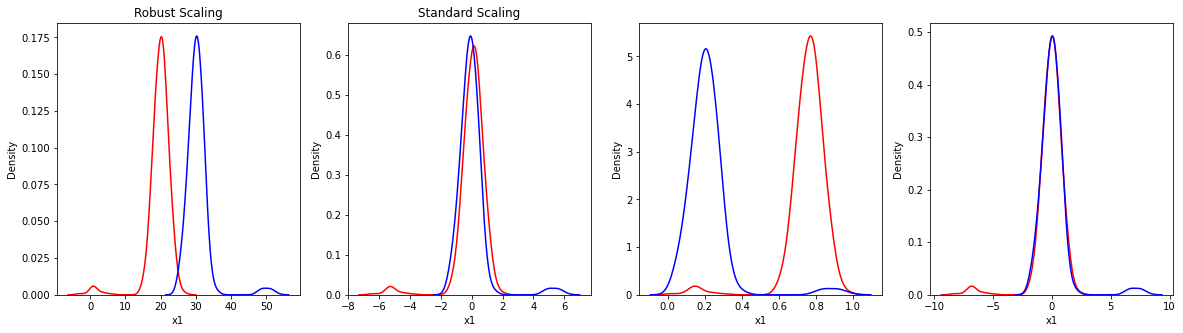

In [13]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'],ax=ax1,color='red')
sns.kdeplot(x['x2'],ax=ax1,color='blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'],ax=ax2,color='red')
sns.kdeplot(standard_df['x2'],ax=ax2,color='blue')

ax1.set_title("Minmax Scaling")
sns.kdeplot(minmax_df['x1'],ax=ax3,color='red')
sns.kdeplot(minmax_df['x2'],ax=ax3,color='blue')

ax1.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'],ax=ax4,color='red')
sns.kdeplot(robust_df['x2'],ax=ax4,color='blue')
plt.show()

## iris 데이터에 적용

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_scaled_df1 = pd.DataFrame(iris_scaled, columns = iris.feature_names)
# iris_scaled_df.describe()
print('feature 들의 평균 값')
print(iris_scaled_df1.mean())
print('\nfeature 들의 분산 값')
print(iris_scaled_df1.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [36]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_scaled_df2 = pd.DataFrame(iris_scaled, columns = iris.feature_names)
# iris_scaled_df.describe()
print('feature 들의 최소 값')
print(iris_scaled_df2.min())
print('\nfeature 들의 최대 값')
print(iris_scaled_df2.max())

feature 들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [38]:
from sklearn.preprocessing import RobustScaler, robust_scale
# RobustScaler 객체 생성
scaler = RobustScaler()
# RobustScaler 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_scaled_df3 = pd.DataFrame(iris_scaled, columns = iris.feature_names)
# iris_scaled_df.describe()
print('feature 들의 평균 값')
print(iris_scaled_df3.mean())
print('\nfeature 들의 분산 값')
print(iris_scaled_df3.var())

feature 들의 평균 값
sepal length (cm)    0.033333
sepal width (cm)     0.114667
petal length (cm)   -0.169143
petal width (cm)    -0.067111
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.405736
sepal width (cm)     0.759918
petal length (cm)    0.254390
petal width (cm)     0.258225
dtype: float64


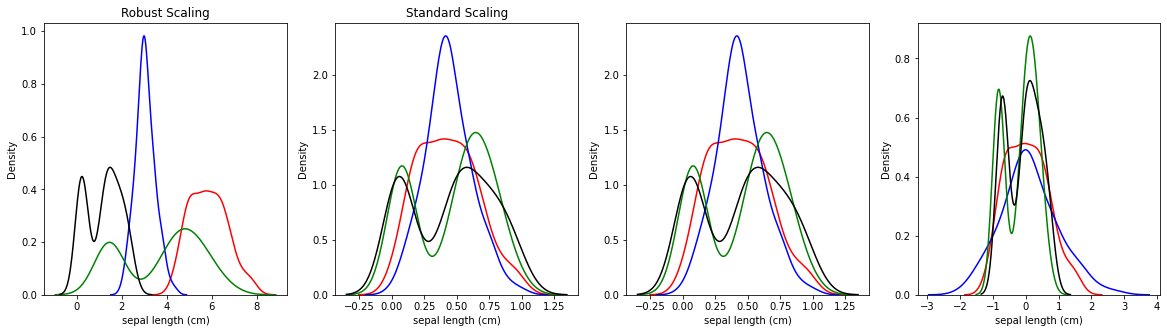

In [35]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(iris_df['sepal length (cm)'],ax=ax1,color='red')
sns.kdeplot(iris_df['sepal width (cm)'],ax=ax1,color='blue')
sns.kdeplot(iris_df['petal length (cm)'],ax=ax1,color='green')
sns.kdeplot(iris_df['petal width (cm)'],ax=ax1,color='black')

ax2.set_title("Standard Scaling")
sns.kdeplot(iris_scaled_df['sepal length (cm)'],ax=ax2,color='red')
sns.kdeplot(iris_scaled_df['sepal width (cm)'],ax=ax2,color='blue')
sns.kdeplot(iris_scaled_df['petal length (cm)'],ax=ax2,color='green')
sns.kdeplot(iris_scaled_df['petal width (cm)'],ax=ax2,color='black')

ax1.set_title("Minmax Scaling")
sns.kdeplot(iris_scaled_df2['sepal length (cm)'],ax=ax3,color='red')
sns.kdeplot(iris_scaled_df2['sepal width (cm)'],ax=ax3,color='blue')
sns.kdeplot(iris_scaled_df2['petal length (cm)'],ax=ax3,color='green')
sns.kdeplot(iris_scaled_df2['petal width (cm)'],ax=ax3,color='black')

ax1.set_title("Robust Scaling")
sns.kdeplot(iris_scaled_df3['sepal length (cm)'],ax=ax4,color='red')
sns.kdeplot(iris_scaled_df3['sepal width (cm)'],ax=ax4,color='blue')
sns.kdeplot(iris_scaled_df3['petal length (cm)'],ax=ax4,color='green')
sns.kdeplot(iris_scaled_df3['petal width (cm)'],ax=ax4,color='black')
plt.show()